In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
from thinkdsp import Chirp

class TromboneGliss(Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end # 先將給予函數的取倒數
        lengths = np.linspace(l1, l2, len(ts)) # 算出時間
        freqs = 1 / lengths # 再倒數
        
        PI2 = 2 * np.pi
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [4]:
# 先取前段由高到低
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [5]:
# 再取後段由低到高
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [6]:
wave = wave1 | wave2
wave.make_audio()

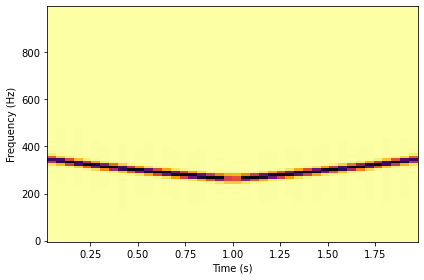

In [7]:
sp = wave.make_spectrogram(1024) # 選1024是為清楚看見趨勢
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')